### Multivariate Linear Regression. Standardization and analysis of the residuals.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### Example: bivariate dataset

- ice_cream sales as a function of temperature and humidity

In [3]:
# coeficients
b0 = 44 #np.random.randint(40, 50)
b1 = 1.037191424 # np.abs(np.random.normal(0.5, 1.2))
b2 = 1.271543234 # np.abs(np.random.normal(1, 1.2))
# variables
def value():
    t = np.random.normal(27, 4)
    h = np.random.normal(50, 5)
    e = np.random.normal(0, 1) *5    
    v = b0 + b1 *t + b2 *h + e 
    return (t, h, v)
b0, b1, b2

(44, 1.037191424, 1.271543234)

In [4]:
ice_cream = pd.DataFrame([value() for i in range(400)], columns = ['temperature', 'humidity', 'sales'])

In [5]:
ice_cream.head(2)

,temperature,humidity,sales
0,26.289473,42.160961,119.787689
1,25.227347,44.768846,136.188093


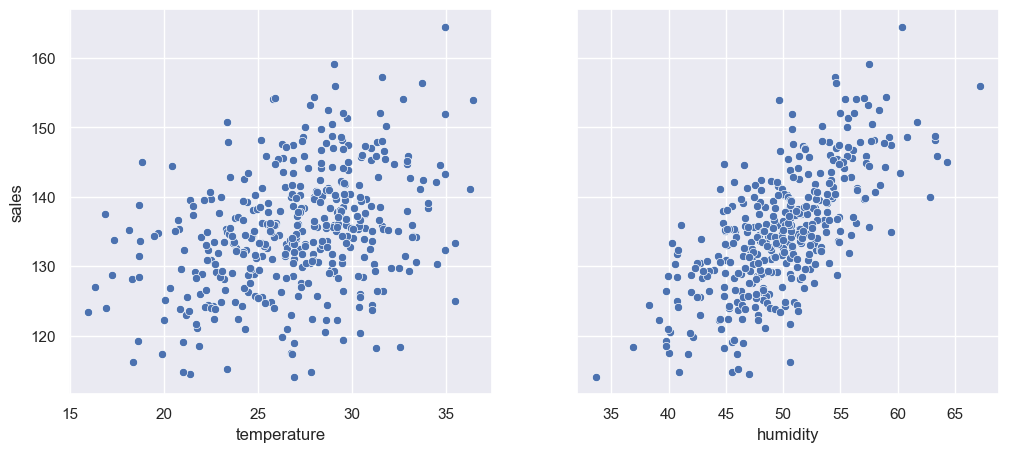

In [6]:
_, axs = plt.subplots(1, 2, figsize = (12, 5), sharey = True)
sns.scatterplot(ax = axs[0], data = ice_cream, x = 'temperature', y = 'sales')
sns.scatterplot(ax = axs[1], data = ice_cream, x = 'humidity', y = 'sales');

#### train/test split

In [7]:
Xtrain, Xtest = train_test_split(ice_cream, test_size = 0.2, random_state = 2898)
Xtrain.shape, Xtest.shape

((320, 3), (80, 3))

#### fit model

In [8]:
X = Xtrain[['temperature', 'humidity']].to_numpy().reshape(-1, 2)
Y = Xtrain.sales.values.reshape(-1, 1)
lr = LinearRegression().fit(X, Y)

In [33]:
# És raro que perquè s'han de posar les columnes al revés però no acba d'anar bé. 
# És el que estaba intentant al notebok 54.1 però s'ha de fer així i punto, coses de python
Xtrain.head(5)

,temperature,humidity,sales
288,20.850144,49.285993,123.785088
289,26.213783,41.997941,126.326510
74,28.635551,50.356842,135.555401
290,30.460131,47.604767,125.965564
271,29.247345,42.921543,128.248344


In [32]:
X[0:5], Y[0:5]

(array([[20.85014369, 49.28599251],
        [26.21378338, 41.99794072],
        [28.63555088, 50.35684213],
        [30.46013146, 47.60476685],
        [29.24734529, 42.92154311]]),
 array([[123.78508836],
        [126.32650963],
        [135.55540056],
        [125.96556419],
        [128.24834361]]))

#### Veiem com a partir de les dades de entrenament, el model troba la línia de regressió
- No són ven bé les rectes de regressió perquè tenim un pla en aquest cas, cos que explico més avall crec. 

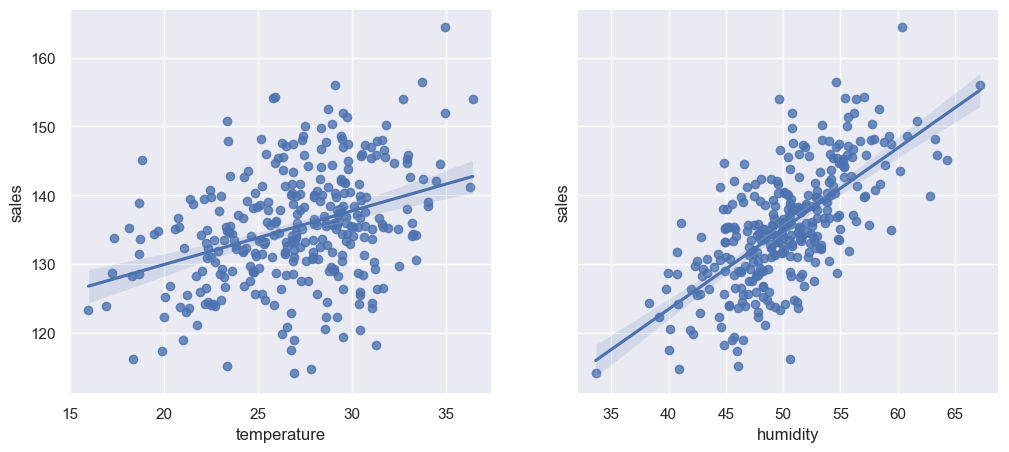

In [35]:
_, axs = plt.subplots(1, 2, figsize = (12, 5), sharey = True)
sns.regplot(ax = axs[0], data = Xtrain, x = 'temperature', y = 'sales')
sns.regplot(ax = axs[1], data = Xtrain, x = 'humidity', y = 'sales');

In [10]:
print('Intercept \u03B20: %.5f' % lr.intercept_[0])
print('Coeficients \u03B21: %.5f' % lr.coef_[0][0])
print('Coeficients \u03B22: %.5f' % lr.coef_[0][1])

Intercept β0: 46.33753
Coeficients β1: 0.95686
Coeficients β2: 1.25884


#### predict

In [11]:
Xtest['predict'] = lr.predict(Xtest[['temperature', 'humidity']].to_numpy().reshape(-1, 2))

In [12]:
Xtest.head(2)

,temperature,humidity,sales,predict
173,24.466562,41.922663,128.766523,122.522417
24,24.660946,49.888189,134.408325,132.735712


In [13]:
# sns.regplot(data = Xtest, x = 'sales', y = 'predict');

- No han de sortir els punts predits com una recta, perquè es un model multivariant
- La regressió multivariant ho fa respecte un pla no una recta, els punts estaríen dins el pla.
- Per baixes humitats puja la temperatures i les ventes pujen, per altes humitats les ventes pujen més. 
    - Puja la humitat pujen ventes, puja la temperatura, pujen ventes, una independent de l'altre. Si estàn els dos pujen més. 
    - És el que es veu amb les dues gràfiques, que té correlació positiva amb les dues variables.
- Aquí no es veuen en la recta, perquè estem mirant els punts respecte a la recta "els punts abatits al eix que li toca".
- **Si volem veure això, ho podem fer al pla de sota del tot**

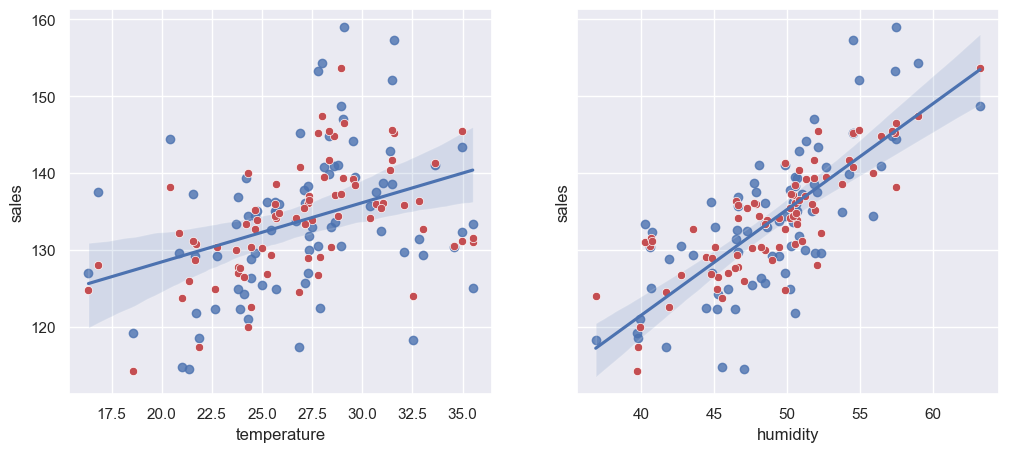

In [14]:
_, axs = plt.subplots(1, 2, figsize = (12, 5), sharey = True)
sns.regplot(ax = axs[0], data = Xtest, x = 'temperature', y = 'sales', color = 'b')
sns.scatterplot(ax = axs[0], data = Xtest, x = 'temperature', y = 'predict', color = 'r')

sns.regplot(ax = axs[1], data = Xtest, x = 'humidity', y = 'sales', color = 'b');
sns.scatterplot(ax = axs[1], data = Xtest, x = 'humidity', y = 'predict', color = 'r');

# Punts blaus són les dades d'entrenament, la linia blava amb la hombra és la linia de regressió i amb vermell 
# els valors predits

Text(0.5, 0, 'Ventas Predites')

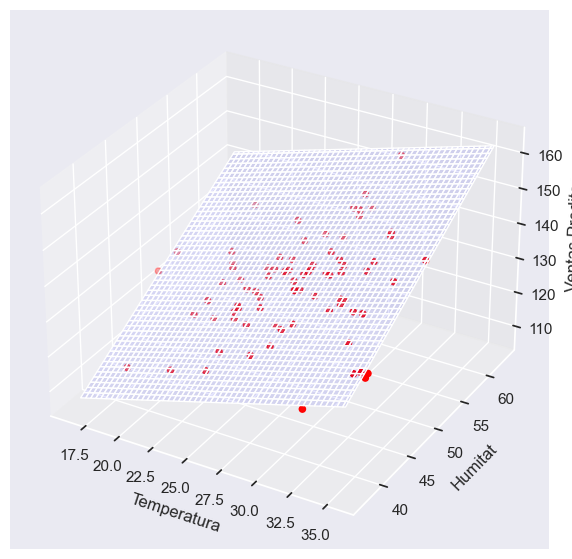

In [15]:
# Dades dels punts
cols = Xtest[['temperature', 'humidity', 'predict']].values
temp = cols[:, 0]
hum = cols[:, 1]
pred = cols[:, 2]

# 3D scatter plot
fig = plt.figure(figsize = (7, 7))
axs = fig.add_subplot(projection = '3d')

# Coeficientes del pla
beta0 = 40.05877
beta1 = 1.10802
beta2 = 1.32235

# Dades del pla
x_aux = np.linspace(min(temp), max(temp), 100)
y_aux = np.linspace(min(hum), max(hum), 100)
X_aux, Y_aux = np.meshgrid(x_aux, y_aux)
Z = beta0 + beta1*X_aux + beta2*Y_aux

# Plot del pla
axs.plot_surface(X_aux, Y_aux, Z, alpha=0.1, color='blue')

# Plot dels punts
axs.scatter(temp, hum, pred, color='red')

axs.set_xlabel('Temperatura')
axs.set_ylabel('Humitat')
axs.set_zlabel('Ventas Predites')

#### model evaluation

In [16]:
# Evaluació del model
mse = mean_squared_error(Xtest.sales, Xtest.predict, squared = True)
print("MSE: %.4f" % mse)

# Desviació mitja (magnitud de la trajedia)
rmse = mean_squared_error(Xtest.sales, Xtest.predict, squared = False)
print("RMSE: %.4f" % rmse)

rsq = r2_score(Xtest.sales, Xtest.predict)
print('R-quadrat: %.5f' % rsq)

MSE: 27.6539
RMSE: 5.2587
R-quadrat: 0.68666


# Com ens podem fiar de les dades?

- S'habien de complir lu dels residus amb desviació normal, siguin variables relacionades, observacions independents i no tingui outliers

## Anem a veure que hi ha `Normality of Residuals`
- Que els residus segueixin una distribució normal. 

### analysis of the residuals (check normality)

- how does it look the histogram of a normal sample ?

In [17]:
# Creem una distribució gausseana
gaussian_sample = np.random.normal(0, 1, 10000)

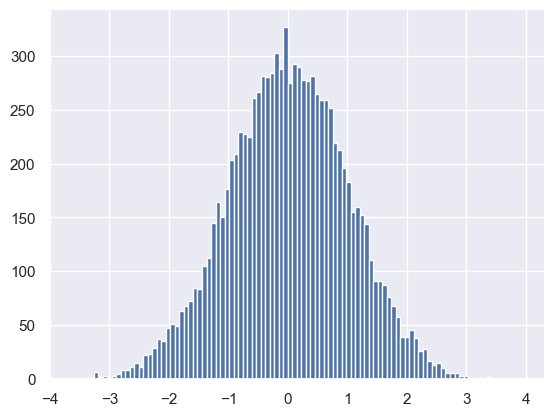

In [18]:
plt.hist(gaussian_sample, bins = 100);

- how does it look the histogram of our residuals ?

In [19]:
# Els residus són la resta de la predicció (lr.predict(X) menys la real)
residuals = np.array([(y -p) for y, p in zip(Xtrain.sales, lr.predict(X))])

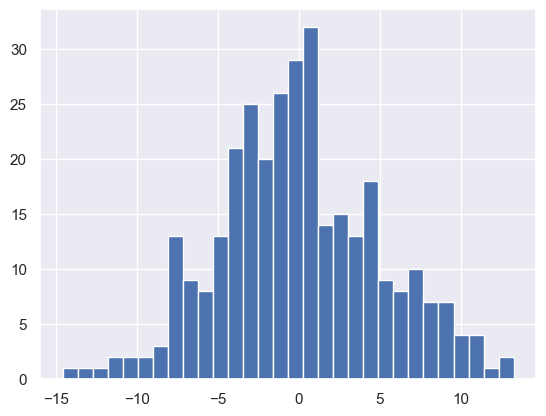

In [20]:
plt.hist(residuals, bins = 30);

## Visualitzar va bé, però l'ull enganya molt!!
- Com a argument no n'hi ha prou. 

### Q-Q plot

- we can use the Q-Q plot to check the normality of the residuals
- the Q-Q plot depicts the quantiles of our sample with respect to a reference distribution, in this case, a ***normal*** distribution

- Eina per veure com s'ajusten unes dades a una distribució concreta **ara en una distribució normal**, que també és la més comuna. 
- Q-Q representen els quantils d'una distribució respecte els quantils de la distribució. 
- En una distribució normal, el quantil 50, cau al centre.

In [21]:
import scipy.stats as stats

- what are the quantiles of a normal distribution ?

In [22]:
np.linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [23]:
# volem els quantils (0, 1, 11) -> 10, 20, ... 90, 100
np.quantile(gaussian_sample, np.linspace(0, 1, 11))

array([-3.6400492 , -1.267802  , -0.83715125, -0.51664121, -0.2418217 ,
        0.00559615,  0.26677944,  0.54199882,  0.85342878,  1.29320881,
        3.93602237])

- quants representen el 10% -> primer valor
- quants n'hem vist fins a fer el 90% valor penultim

- what are the quantiles of our residuals ?
<hr />
- No surten igual perquè la de abans està estandaritzada. 
- Els nostres quantils és una gausseana, però de -15 a +15, més plana, més variança.
- Qualsevol distribució normal, sempre la podem estanderitzar. 

In [24]:
np.quantile(residuals, np.linspace(0, 1, 11))

array([-14.58496824,  -6.34833672,  -4.03432471,  -2.65655001,
        -1.2412755 ,  -0.21310979,   0.68584302,   2.20833632,
         4.31354214,   6.88781904,  13.28465041])

- they do not look very much similar, but this is because the variances (and the ranges) are different:

In [25]:
# S'aixample molt més
np.var(gaussian_sample), np.var(residuals)

(1.0077145297975398, 24.687395109871364)

### standardization

- for the comparison we need to ***standardize*** the sample
- standardization of a sample consists in substracting the *mean* and dividing by the *standard deviation*, i.e.:

$z_i = \frac{x_i - \bar{x}}{\sigma}$
- where:
    - $\bar{x}$ is the mean of the sample
    - $\sigma$ is the standard-deviation of the sample
    
<hr />

- restar la seva mitjana i dividir per la desviació estandard. El valor que es correspondría a si vingues d'una distribució normal. 

In [26]:
standardized_residuals = (residuals - np.mean(residuals)) /np.std(residuals)

- now the quantiles look more similar to a normal distribution

In [27]:
# Si sortis de -15 a 15 no estaría bé perquè ho hem estanderitzat. 
np.quantile(standardized_residuals, np.linspace(0, 1, 11))

array([-2.93540381, -1.27768066, -0.81195735, -0.53466328, -0.24982192,
       -0.04289096,  0.13803432,  0.44445478,  0.86815328,  1.38625809,
        2.67369889])

- we can check this by means of the qq-plot

In [28]:
len(standardized_residuals)

320

`np.linspace(0, 1, 101)` tenim els quantis més fins &rarr; més bins

Text(0.5, 1.0, 'QQ-plot of the residuals')

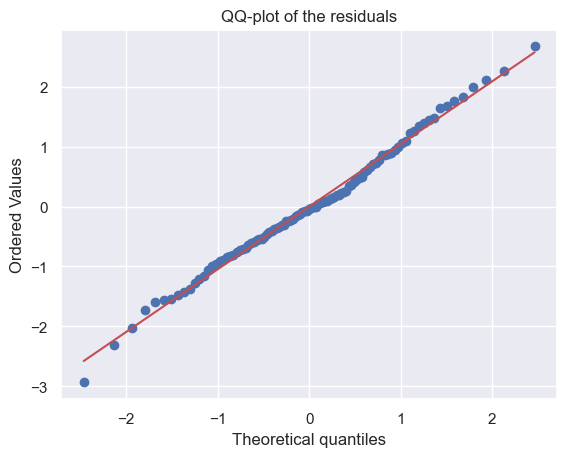

In [29]:
stats.probplot(np.quantile(standardized_residuals, np.linspace(0, 1, 101)), dist = 'norm', plot = plt.subplot());
plt.title('QQ-plot of the residuals')

Plot de una normal perfecte VS la nostre estanderitzada. 
- Punts, per cada quantil, mira el valor que surt (la suma de mostres que hi ha fins el moment).
- Linia vermella la pinta el plot representa el match perfecte si la nostre distribució fos exactament normal, tots els punts estaríen a sobre la recte. 
- Com més s'envagin respecte la recta, menys normal és la nostre distribució. 
- Si fes una S cap a un costat o l'altre, seria distribució amb la muntanya desplaçada cap a un costat.
    - Si sortissin així, no està bé, sistematicament estem predint per sota/sobre i la regressió no està bé. 
    

## Q-Q per veure si una serie de valors segueix una distribució normal. 

## No caldría normalitzar-ho perquè surt el mateix